# Здравствуйте

**Продолжаю улучшать свои навыки и знания.
Предлагаю ознакомиться с мини проектом "Shop", в котором привожу решение типовых задач.**

## Задачи

    1)Загрузить два датасета user_data и logs. 
    2)Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. 
    3)Узнать сколько уникальных значений принимает переменная platform.
    4)Какой клиент совершил больше всего успешных операций? 
    5)Если несколько пользователей совершили одинаковое число успешных действий, 
     перечислить их идентификаторы (client) через запятую и пробел в порядке возрастания.
    6)С какой платформы осуществляется наибольшее количество успешных операций?
    7)Какую платформу предпочитают премиальные клиенты?
    8)Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет).
    9)Построить график распределения числа успешных операций.
    10)Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [15]:
import pandas as pd

In [16]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', encoding='utf-8')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', encoding='utf-8')

In [17]:
logs.head()
# вывожу заголовки таблицы и 5 первых строк

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [18]:
user_data.info

<bound method DataFrame.info of       client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]>

Чтобы узнать размер таблицы (датафрэйма), нужно обратиться к атрибуту.
**shape**
возвращает кортеж (упрощённый список, обращаюсь к нему, как к списку), где сначала идёт число строк, а потом число колонок
**выясню типы колонок**
Для этого применяю атрибут
**dtypes**
быстро взглянуть на информацию о распределении данных
можно использовать метод 
**describe**


In [19]:
logs.platform.describe()
# видим, переменная принемает 3 уникальных значения, тип данных object, количество строк 4500,
# самое популярнрное значение phone 

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

Узнаю, какой клиент совершил больше всего успешных операций.

Возможно, несколько пользователей совершили одинаковое число успешных действий, перечислю их идентификаторы (client) через запятую и пробел в порядке возрастания. 

'**query**' -
Этим методом отберу успешные значения, далее проведу группировку по клиентам, и посчитаю для каждого клиента число успешных операций с помощью 
'**groupby**';
'**agg**';
'**count**';
'**sort_values**'.
Выведу список клиентов по убыванию (cверху топовые - совершившие максимальное количество покупок) 
Сохраняю результат в отдельную переменную **success_number**.
Далее узнаю максимальное число успешных действий(покупок), результат сохраню в переменную **max_success**, отображает id клиента и количество совершенных им покупокупок.


In [20]:
success_number = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'platform' : 'count'}) \
                    .rename(columns={'platform' : 'success_number'}) \
                    .sort_values('success_number', ascending=False)

# ascending - вывод при сортировке 1->9 или False = 9->1

success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [21]:
maximum_success = success_number.max()
maximum_success

client            99993
success_number       41
dtype: int64

Далее узнаю всех клиентов с числом максимальных действий равных максимуму и извлеку id клиентов в список (successful_clients), отсортировав в порядке возрастания 

In [22]:
successful_clients = success_number.query('success_number == @maximum_success.success_number') \
                                    .sort_values('client') \
                                    .client \
                                    .tolist()

# tolist() используется для преобразования серии в список

In [23]:
successful_clients
# пользователи совершили одинаковое число успешных действий, 
     # вывел их идентификаторы (client) через запятую и пробел в порядке возрастания

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Далее применяю метод **join**  для создания списка из строк.
Т.е сейчас есть числа из которох создаю список, переведя числа в строки.


In [24]:
', '. join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

**Теперь использую более простой метод**


In [28]:
success_number2 = logs \
                       .groupby('client', as_index=False) \
                       .agg({'success' : 'sum'}) \
                       .rename(columns={'success' : 'success_number'}) \
                       .sort_values('success_number', ascending=False)

In [29]:
maximum_success2 == success_number2.max()       

NameError: name 'maximum_success2' is not defined

In [30]:
successful_clients2 = success_number2.query('success_number == @maximum_success.success_number') \
                                    .sort_values('client') \
                                    .client \
                                    .tolist()

In [31]:
successful_clients2
# пользователи совершили одинаковое число успешных действий, 
     # вывел их идентификаторы (client) через запятую и пробел в порядке возрастания

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Проверю расчеты, для того что бы убедиться в верности втрого метода решения.

In [32]:
successful_clients2 == successful_clients
# при сравнении методов получаю ответ "True" , следовательно результаты вычеслений равны.

True

In [33]:
# Сохраню полученные даныые id пользователей в новый фаил 

In [34]:
successful_clients_id = pd.DataFrame({'successful_clients_id': [12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]})

In [38]:
#with pd.ExcelWriter('successful_clients_id.xlsx') as writer:successful_clients_id.to_excel(writer)    

In [39]:
writer.save()
# список сохранен в нашей рабочей папке в файле Excel имя successful_clients_id

**Узнаю с какой платформы осуществляется наибольшее количество успешных операций**

In [40]:
successful_platform = logs.query('success == True').platform.value_counts().idxmax()

In [41]:
print(successful_platform)

phone


**Узнаю kакая платформа наиболее популярна среди премиальных клиентов**

Объединяю датафрэймы с клиентами и логами, затем выберу премиумных клиентов.
Джоины делаю с помощью метода **merge**.

In [42]:
data = user_data.merge(logs)

In [43]:
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

phone       177
computer    108
tablet       18

Из результа видим самую папулярную платформу 'phone'

**Визуализирую распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**.




Импортирую библиотеку для построения графиков и визуализации.

In [44]:
import seaborn as sns,  numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [45]:
not_premium_agg = data.query('premium == False').age

premium_agg = data.query('premium == True').age

<AxesSubplot:xlabel='age (years)', ylabel='premium_level'>

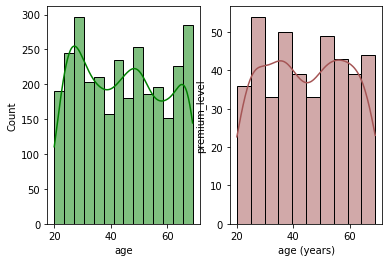

In [46]:
Figure, ax = plt.subplots(nrows=1, ncols=2)
plt.xlabel('age (years)')
plt.ylabel('premium_level')

sns.histplot(data=not_premium_agg, ax=ax[0], kde=True, color='green') 
sns.histplot(data=premium_agg, ax=ax[1], kde=True, color='#A55555')


На графике отображена гистограма не примеальных клиетов с осями: y= уровень примеальности и x= возрас

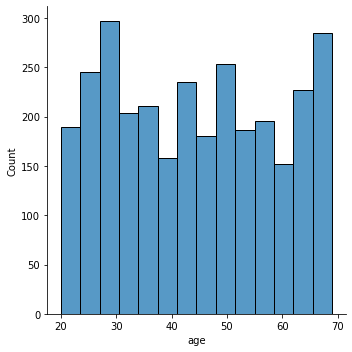

In [47]:
sns.displot(not_premium_agg)

На графике отображена гистограма примеальных клиетов с осями: y = уровень примеальности и x = возрас

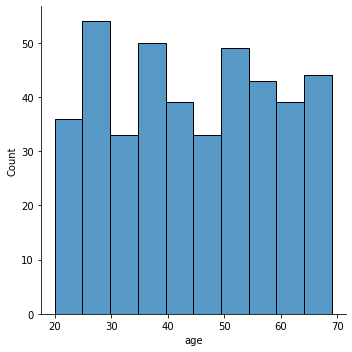

In [48]:
sns.displot(premium_agg)

Теперь построю график распределения числа успешных операций: 

    x – число успешных операций
    y – число клиентов, совершивших столько успешных операций

In [49]:
client_vr_success_number = data.groupby('client') \
                                .agg({'success' : 'sum'})

<AxesSubplot:ylabel='Count'>

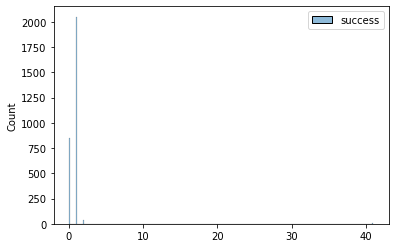

In [50]:
sns.histplot(client_vr_success_number)

In [51]:
client_vr_success_number.value_counts()

success
1          2051
0           850
2            42
41            9
3             1
40            1
dtype: int64

Визуализирую число успешных операций, сделанных на платформе computer, в зависимости от возраста.
По оси x – возраст, y – число успешных операций. 
Расчитаю, клиенты какого возраста совершили наибольшее количество успешных действий?


In [52]:
age_vs_success_number = data.query('platform == "computer"') \
                            .groupby('age', as_index=False ) \
                            .agg({'success' : 'sum' })

<AxesSubplot:xlabel='age', ylabel='success'>

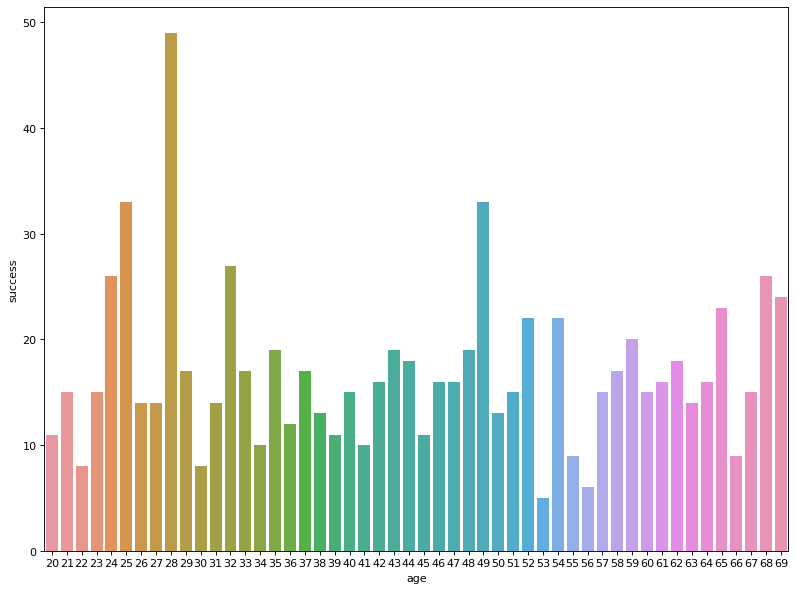

In [53]:
plt.figure(figsize=(12 , 9), dpi=80)
sns.barplot(x='age', y='success', data=age_vs_success_number)

In [54]:
plt.savefig('age_vs_success_number.jpg', dpi=80)

<Figure size 432x288 with 0 Axes>

***Рассмотрю еще один способ решения***

In [55]:
computer_success = data.query('platform == "computer" and success == True')

C:\Users\Professional\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

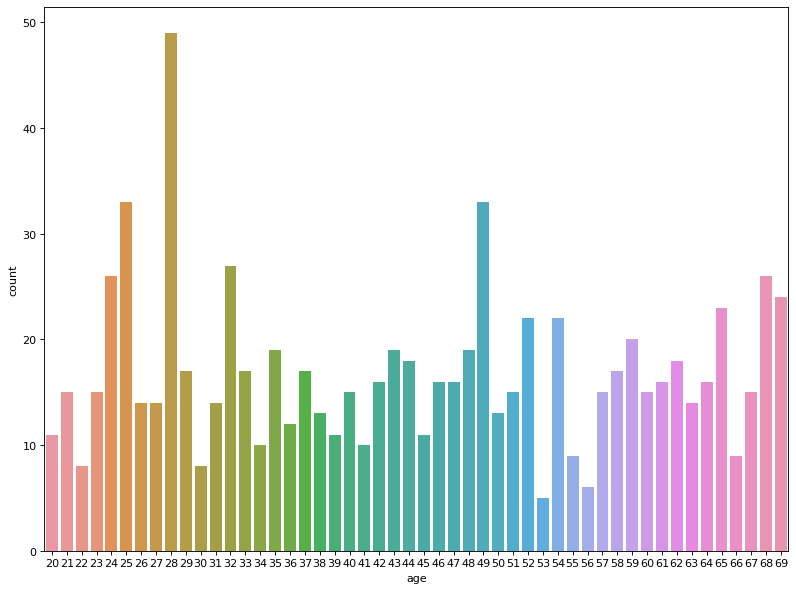

In [56]:
plt.figure(figsize=(12 , 9), dpi=80)
sns.countplot(computer_success.age)

***Сохраню полученный график в фаил *** 

In [57]:
plt.savefig('computer_success.jpg')

<Figure size 432x288 with 0 Axes>

# Аналитическая записка

### Итоги аналитического исследования пользователей 

* В результате подведения аналитического исследования данных 4



                                                                                                            С уважением,
                                                                                                            Осокин Максим
                                                                                                            Владимирович

    1)Загрузить два датасета user_data и logs. 
    2)Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. 
    3)Узнать сколько уникальных значений принимает переменная platform.
    4)Какой клиент совершил больше всего успешных операций? 
    5)Если несколько пользователей совершили одинаковое число успешных действий, 
     перечислить их идентификаторы (client) через запятую и пробел в порядке возрастания.
    6)С какой платформы осуществляется наибольшее количество успешных операций?
    7)Какую платформу предпочитают премиальные клиенты?
    8)Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет).
    9)Построить график распределения числа успешных операций.
    10)Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?